In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [4]:
crime = pd.read_csv("data.csv")

In [5]:
crime[:3]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,6530342,HP603653,10/01/2008 03:30:00 PM,076XX S COTTAGE GROVE AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,6.0,69.0,08B,1182884.0,1854628.0,2008,02/04/2016 06:33:39 AM,41.756303,-87.605332,"(41.756302533, -87.605331512)"
1,6530343,HP603773,10/01/2008 05:00:00 PM,031XX S GREEN ST,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,False,False,...,11.0,60.0,05,1171221.0,1884004.0,2008,02/04/2016 06:33:39 AM,41.837176,-87.647215,"(41.837176353, -87.647214569)"
2,6530344,HP600313,09/29/2008 04:15:00 PM,063XX S STONY ISLAND AVE,0890,THEFT,FROM BUILDING,OTHER,False,False,...,20.0,42.0,06,1187961.0,1863261.0,2008,02/04/2016 06:33:39 AM,41.779873,-87.586451,"(41.779872827, -87.586450869)"


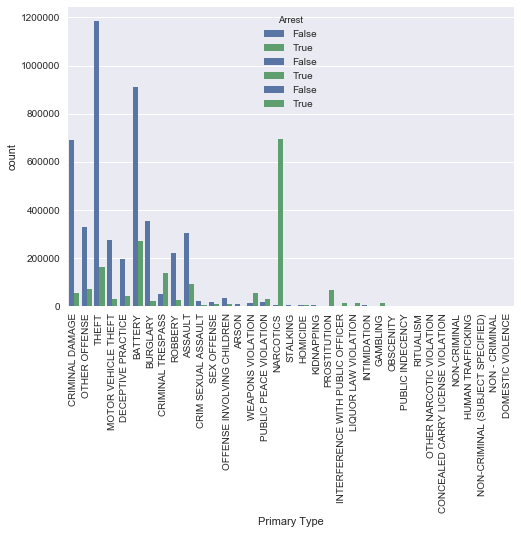

In [6]:
plt.xticks(rotation=90)
sns.countplot(x='Primary Type', hue='Arrest', data=crime)
plt.show()

In [55]:
mini_crime = crime[:100]
def convert_to_datetime(row) :
    dt = parser.parse(row["Date"])
    return dt
    
def label_day_of_week (row) :
    dt = row["Datetime"]
    return dt.weekday()

def label_day_of_month (row) :
    dt = row["Datetime"]
    return dt.day

def label_month(row) :
    dt = row["Datetime"]
    return dt.month
def label_year(row) :
    dt = row["Datetime"]
    return dt.year


In [32]:
crime["Datetime"] = crime.apply(lambda row : convert_to_datetime(row), axis = 1)
crime[:3]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Datetime
0,6530342,HP603653,10/01/2008 03:30:00 PM,076XX S COTTAGE GROVE AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,69.0,08B,1182884.0,1854628.0,2008,02/04/2016 06:33:39 AM,41.756303,-87.605332,"(41.756302533, -87.605331512)",2008-10-01 15:30:00
1,6530343,HP603773,10/01/2008 05:00:00 PM,031XX S GREEN ST,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,False,False,...,60.0,05,1171221.0,1884004.0,2008,02/04/2016 06:33:39 AM,41.837176,-87.647215,"(41.837176353, -87.647214569)",2008-10-01 17:00:00
2,6530344,HP600313,09/29/2008 04:15:00 PM,063XX S STONY ISLAND AVE,0890,THEFT,FROM BUILDING,OTHER,False,False,...,42.0,06,1187961.0,1863261.0,2008,02/04/2016 06:33:39 AM,41.779873,-87.586451,"(41.779872827, -87.586450869)",2008-09-29 16:15:00


In [36]:
crime["Day of Week"] = crime.apply(lambda row : label_day_of_week(row), axis = 1)

In [37]:
crime["Day Of Month"] = crime.apply(lambda row : label_day_of_month(row), axis = 1)

In [38]:
crime["Month"] = crime.apply(lambda row : label_month(row), axis = 1)

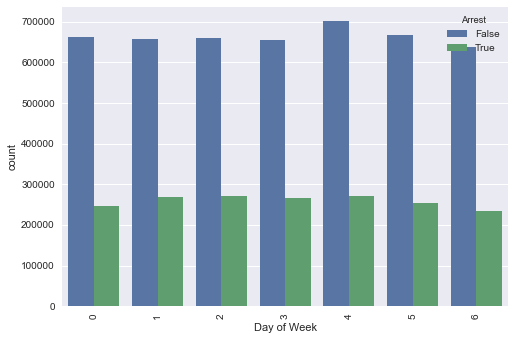

In [39]:
plt.xticks(rotation=90)
sns.countplot(x='Day of Week', hue='Arrest', data=crime)
plt.show()

In [41]:
crime[:3]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Datetime,Day of Week,Day Of Month,Month
0,6530342,HP603653,10/01/2008 03:30:00 PM,076XX S COTTAGE GROVE AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,1854628.0,2008,02/04/2016 06:33:39 AM,41.756303,-87.605332,"(41.756302533, -87.605331512)",2008-10-01 15:30:00,2,1,10
1,6530343,HP603773,10/01/2008 05:00:00 PM,031XX S GREEN ST,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,False,False,...,1884004.0,2008,02/04/2016 06:33:39 AM,41.837176,-87.647215,"(41.837176353, -87.647214569)",2008-10-01 17:00:00,2,1,10
2,6530344,HP600313,09/29/2008 04:15:00 PM,063XX S STONY ISLAND AVE,0890,THEFT,FROM BUILDING,OTHER,False,False,...,1863261.0,2008,02/04/2016 06:33:39 AM,41.779873,-87.586451,"(41.779872827, -87.586450869)",2008-09-29 16:15:00,0,29,9


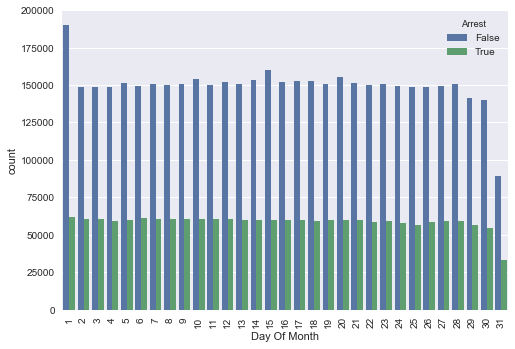

In [42]:
plt.xticks(rotation=90)
sns.countplot(x="Day Of Month", hue='Arrest', data=crime)
plt.show()

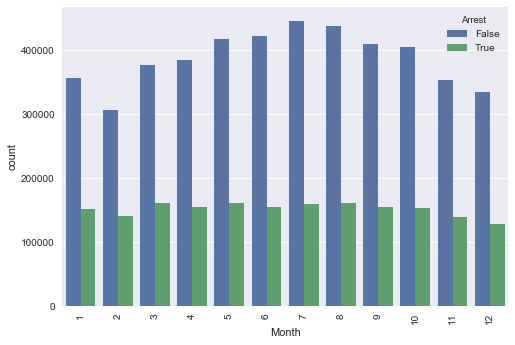

In [43]:
plt.xticks(rotation=90)
sns.countplot(x='Month', hue='Arrest', data=crime)
plt.show()

In [58]:
usable_crime = crime.copy(True)
usable_crime["Year"] = usable_crime.apply(lambda row : label_year(row), axis=1)
usable_crime[0:3]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Datetime,Day of Week,Day Of Month,Month
0,6530342,HP603653,10/01/2008 03:30:00 PM,076XX S COTTAGE GROVE AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,1854628.0,2008,02/04/2016 06:33:39 AM,41.756303,-87.605332,"(41.756302533, -87.605331512)",2008-10-01 15:30:00,2,1,10
1,6530343,HP603773,10/01/2008 05:00:00 PM,031XX S GREEN ST,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,False,False,...,1884004.0,2008,02/04/2016 06:33:39 AM,41.837176,-87.647215,"(41.837176353, -87.647214569)",2008-10-01 17:00:00,2,1,10
2,6530344,HP600313,09/29/2008 04:15:00 PM,063XX S STONY ISLAND AVE,0890,THEFT,FROM BUILDING,OTHER,False,False,...,1863261.0,2008,02/04/2016 06:33:39 AM,41.779873,-87.586451,"(41.779872827, -87.586450869)",2008-09-29 16:15:00,0,29,9


In [60]:
usable_crime = usable_crime[
    (usable_crime["Primary Type"] != "GAMBLING") &
    (usable_crime["Primary Type"] != "LIQUOR LAW VIOLATION") &
    (usable_crime["Primary Type"] != "PROSTITUTION") &
    (usable_crime["Primary Type"] != "NARCOTICS") &
    (usable_crime["Primary Type"] != "PUBLIC INDECENCY") 
    ]



In [ ]:
usable_crime.drop(inplace = True, labels = ["ID", "Case Number", "Date", "Block", "Primary Type", "Description", "Beat", "Ward", "FBI Code", "Updated_on", "Location"])

In [ ]:
usable_crime["Day of Week"] = usable_crime.apply(lambda row : label_day_of_week(row), axis = 1)

In [ ]:
usable_crime["Day Of Month"] = usable_crime.apply(lambda row : label_day_of_month(row), axis = 1)

In [ ]:
usable_crime["Month"] = usable_crime.apply(lambda row : label_month(row), axis = 1)

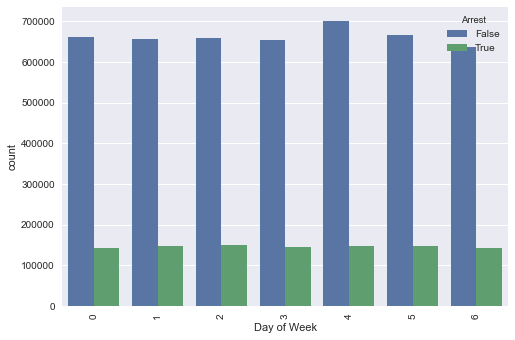

In [52]:
plt.xticks(rotation=90)
sns.countplot(x='Day of Week', hue='Arrest', data=usable_crime)
plt.show()

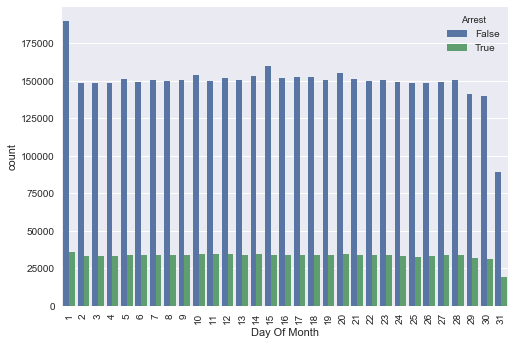

In [53]:
plt.xticks(rotation=90)
sns.countplot(x="Day Of Month", hue='Arrest', data=usable_crime)
plt.show()

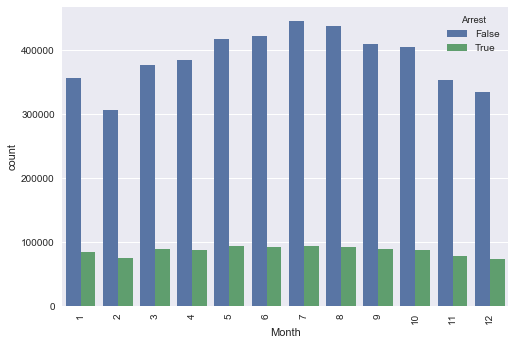

In [54]:
plt.xticks(rotation=90)
sns.countplot(x='Month', hue='Arrest', data=usable_crime)
plt.show()

In [67]:
logistic_crime = usable_crime.copy(True)
logistic_crime.drop(["ID", "Case Number", "Date", "Block", "Primary Type", "Description", "Beat", "Ward", "FBI Code", "Updated On", "Location" ], inplace = True, axis=1)

logistic_crime[:3]




,IUCR,Location Description,Arrest,Domestic,District,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Datetime,Day of Week,Day Of Month,Month
0,0460,SIDEWALK,False,False,6.0,69.0,1182884.0,1854628.0,2008,41.756303,-87.605332,2008-10-01 15:30:00,2,1,10
1,0620,RESIDENCE,False,False,9.0,60.0,1171221.0,1884004.0,2008,41.837176,-87.647215,2008-10-01 17:00:00,2,1,10
2,0890,OTHER,False,False,3.0,42.0,1187961.0,1863261.0,2008,41.779873,-87.586451,2008-09-29 16:15:00,0,29,9
